# Using Open Source AI Models with Hugging Face

Hugging Face has a large ecosystem that consists of a Git platform and multiple open source libraries such as [transformers](https://github.com/huggingface/transformers), [diffusers](https://github.com/huggingface/diffusers), [datasets](https://github.com/huggingface/datasets), [accelerate](https://github.com/huggingface/accelerate), and much [more](https://github.com/huggingface). This project is intended to help you get a broad understanding of Hugging Face ecosystem and its components with a focus on `transformers`. You will learn about

- How to navigate the Hugging Face Hub
- Design principles of the transformers library
- How to use the datasets library to load and create datasets on the Hub
- How to load and use pre-trained open source models to create custom NLP and Computer Vision pipelines

While this project is meant as an introduction, you can always refer to the Hugging Face [documentation pages](https://huggingface.co/docs) and the discussion [forum](https://discuss.huggingface.co/) to learn more about each library and integrated model.

## Before you begin

You'll need a developer account with Hugging Face and create an access token for the final task in this project.

See *getting-started.ipynb* for steps on how to create a token and store it in Workspace.

Note that Task 8 is computationally intensive and takes several minutes to run in Workspace Premium. It does not consistently run in the free version of Workspace. Click 'Get Premium' in the top right of Workspace to upgrade.

## Task 0: Setup

For this project we need the `torch`, `transformers` and `sentencepiece` Python packages in order to load and use pre-trained models. We will also need the `huggingface_hub` package to programmatically login to the Hugging Face Hub and manage repositories, and the `datasets` package to download datasets from the Hub.

### Instructions

The `sentencepiece` package is required by `transformers` to perform inference with some of the pre-trained open source models on Hugging Face Hub and does not need to be explicitly imported. Import the remaining packages as follows.

- Run the provided `!pip` code to install necessary packages.
- Import `torch` 
- Import `huggingface_hub` using the alias `hf_hub`.
- Import `datasets` 
- Import `transformers` 

In [1]:
!pip install datasets==2.13
!pip install huggingface_hub==0.16.4
!pip install pyarrow>=8.0.0

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 12.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 35.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 26.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.6/402.6 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.0/677.0 kB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.9/220.9 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 31.1 MB/s eta 0:00:00
    

In [6]:
pip --quiet install torch transformers


[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import os
import os

# Import torch
import torch

# Import huggingface_hub using the alias hf_hub
import huggingface_hub as hf_hub

# Import datasets 
import datasets

# Import transformers
import transformers

## Task 1: Download Pre-trained Models from the HF Hub 

**Hugging Face Hub as a Git Platform**

The Hugging Face website (also known as the Hub) is essentially a Git platform designed to store pretrained models and datasets as Git repositories. Similar to GitHub, it allows users to explore, create, clone, push repositories and so much more. Each pretrained checkpoint has its own repository and in most cases a descriptive README with code snippets to load and run the model. See the [bert-base-cased](https://huggingface.co/bert-base-cased) model repository as an example.

**How to Use Pretrained Models**

While the Hub is a great place to explore different tasks and pretrained models, we need the `transformers` or `diffusers` libraries in order to load and make predictions with pre-trained models. These two libraries reimplement the code of the state-of-the-art ML research such that vastly different models can be downloaded, loaded into memory and used in a unified way with a few lines of code.

In this task, you will learn how to use the `Auto` classes of `transformers` and the `from_pretrained` method to download and load any model on the Hugging Face Hub. For a full list of supported models, refer to the GitHub [README](https://github.com/huggingface/transformers/tree/main#model-architectures).

**What is the Auto Class?**

`Auto` classes of the `transformers` are simply tools to load models and their data preprocessors in a unified way. Remember, the library reimplements each model such that they each have their own class (`BertModel`, `RobertaModel`, `T5Model`, etc.) with mostly uniform input and output data format across all models. transformers have the following `Auto` class types to load models and their data preprocessors:

- `AutoModel` 
- `AutoModelForTASK>` (more on this below)
- `AutoTokenizer` 
- `AutoFeatureExtractor`
- `AutoImageProcessor`
- `AutoProcessor`

**Loading Models into Memory with from_pretrained**

For the first task, you will download the pretrained "cardiffnlp/twitter-roberta-base-emoji" model and load the model and its data preprocessor into memory with the `from_pretrained(<REPO_NAME_OR_PATH>)` method. The "cardiffnlp/twitter-roberta-base-emoji" is a text classification model that is trained to predict the emoji class ID of a given tweet.

[cardiffnlp/twitter-roberta-base-emoji](https://huggingface.co/cardiffnlp/twitter-roberta-base-emoji) is a valid Git repository on the Hub and the `from_pretrained()` method downloads and uses the tokenizer specific [files](https://huggingface.co/cardiffnlp/twitter-roberta-base-emoji/tree/main) from the model repository.

### Instructions

Use the `AutoTokenizer` and `AutoModel` classes to download a pre-trained language model from the Hub and load its data preprocessor.

- Import `AutoTokenizer` and `AutoModel` classes
- Call the `from_pretrained()` method for both classes using the target repository name as input 
- Identify the explicit class name of the pretrained model using the model configuration

In [3]:
# Import the AutoTokenizer and AutoModel classes from transformers
from transformers import AutoTokenizer, AutoModel

# Load the pre-trained tokenizer of the "cardiffnlp/twitter-roberta-base-emoji" model
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emoji")

**What from_pretrained() does**

The `from_pretrained()` method (see [docs](https://huggingface.co/docs/transformers/main_classes/model#transformers.PreTrainedModel.from_pretrained)) first searches for a model repository with the same name on the Hugging Face Hub but it also accepts a local path or a URL with the expected folder structure. You can simply git clone the repository and load it from your local path.


In [4]:
# Print the tokenizer to see the data preprocessing configuration for this model 
print(tokenizer)

RobertaTokenizerFast(name_or_path='cardiffnlp/twitter-roberta-base-emoji', vocab_size=50265, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50264: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}


**Tokenizers**

NLP models can't process text inputs as it is and need to be converted to a fixed length mathematical format. The `Tokenizer` classes preprocess the text such that each word and punctuation is given a unique ID or a **token**, short sentences are padded and long sentences are truncated to create fixed-size input vectors. They also allow using additional tokens such as _bos, eos, unk, sep_, and more to specify start and end of sentences, and to assign token IDS to unknown words that are not in the tokenizer vocabulary.

The output of the tokenizer tells us this pretrained model uses a tokenizer with a 50265 unique token IDs that applies padding or truncation to the end of each input text, and removes leading (leftside) extra whitespaces. You can always refer to the corresponding Tokenizer [docs](https://huggingface.co/docs/transformers/model_doc/roberta#transformers.RobertaTokenizerFast) to learn more about each preprocessing step.

In [5]:
# Load the pre-trained "cardiffnlp/twitter-roberta-base-emoji" model
model = AutoModel.from_pretrained("cardiffnlp/twitter-roberta-base-emoji")

Some weights of RobertaModel were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-emoji and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Notes on Model Loading**

Take a look at the warning above. We were only able to load a chunk of the model parameters included in the checkpoint with the `AutoModel` class. 

This is because all `transformers` models are designed to have a single base class and multiple task-specific prediction classes built on top of it. The `AutoModel` class is designed to only load the base model parameters such as `RobertaModel` but not task-specific models such as `RobertaForSequenceClassification`.

In order to identify the exact class name and task of your target checkpoint, you can simply refer to the model configuration.

In [6]:
# Get the model configuration 
config = model.config

# Print model config's architectures attribute to see the model class name
print(model.config.architectures)

['RobertaForSequenceClassification']


We found out that the pretrained model we are trying to load is an instance of the `RobertaForSequenceClassification` class. 

**Important Tip**

You don't have to download and print out the configuration to identify the model class name. You can simply navigate to the [config.json](https://huggingface.co/cardiffnlp/twitter-roberta-base-emoji/blob/main/config.json) file within the model repository to find it out.

## Task 2: Downstream Tasks and Task-Specific `AutoModel` Classes

**Limitations of AutoModel**

In the previous task, we learned all about `Auto` classes and the limitations of the `AutoModel` class. We also learned that each `transformers` model consists of a base class and one or more task-specific classes. For example, RoBERTa has the base `RobertaModel` class and multiple prediction classes such as `RobertaForSequenceClassification`, `RobertaForQuestionAnswering`, etc. that leverage the base class. You can always refer to the corresponding model [documentation page](https://huggingface.co/docs/transformers/model_doc/roberta) to see its full list of tasks and classes. 

**Task-Specific AutoModel Classes**

Luckily for us, `transformers` has multiple task-specific `AutoModelForTASK` classes to load pretrained models. For a full list of `Auto` classes, take a look at the [Auto Classes](https://huggingface.co/docs/transformers/model_doc/auto#auto-classes) documentation page.

In this task, you will learn how to load a pretrained model with a task-specific `Auto` model class.


### Instructions

Load the [cardiffnlp/twitter-roberta-base-emoji](https://huggingface.co/cardiffnlp/twitter-roberta-base-emoji) model we used in the previous task with the correct `AutoModelForTASK` class.

- _cardiffnlp/twitter-roberta-base-emoji_ is an instance of the `RobertaForSequenceClassification` class, take a look at the list of [Auto Classes](https://huggingface.co/docs/transformers/model_doc/auto#auto-classes)
- Identify and import the correct Auto class
- Load the pretrained model

In [7]:
# Load the correct AutoModel class for RobertaForSequenceClassification
from transformers import AutoModelForSequenceClassification

# Load the pretrained "cardiffnlp/twitter-roberta-base-emoji" model using the AutoModelForSequenceClassification class and from_pretrained method
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emoji")

## Task 3: Explicit Model and Preprocesser Class Names

We learned how to identify the data preprocessor and model class of a model repository on the Hub in the previous task. Note that you can also do this by navigating to the **Files and versions** tab on the repository [page](https://huggingface.co/cardiffnlp/twitter-roberta-base-emoji) and taking a look at the [config.json](https://huggingface.co/cardiffnlp/twitter-roberta-base-emoji/blob/main/config.json) file.

Similar to models with multiple task-specific model classes, data preprocessor classes are named based on the model name and the modality. 

- `Tokenizer` classes for language models
- `FeatureExtractor` classes for audio models
- `ImageProcessor` classes for computer vision models
- `Processor` classes for multi-modal models

These data preprocessor classes transform raw input data such as text, image, etc. to the format expected by your target pre-trained model. For an vision model, the preprocessor performs steps such as resizing to a fixed size, normalization, cropping, etc. In this task, you will

- Use the "cardiffnlp/twitter-roberta-base-emoji" model we loaded with `Auto` classes before
- Explicitly import a model and its preprocessor class
- Use explicit class names to load a pretrained model and its preprocessor

### Instructions

Start by explicitly importing the tokenizer and model class of "cardiffnlp/twitter-roberta-base-emoji", which we identified in our previous task.

- Use the from_pretrained method to download and load the tokenizer and model

In [8]:
# Import the explicit tokenizer class of "cardiffnlp/twitter-roberta-base-emoji"
from transformers import RobertaTokenizerFast

# Import the explicit model class of "cardiffnlp/twitter-roberta-base-emoji"
from transformers import RobertaForSequenceClassification

We can now use the explicit tokenizer and model classes the same way we use the Auto classes.

In [9]:
# Load the tokenizer and model of "cardiffnlp/twitter-roberta-base-emoji"
tokenizer = RobertaTokenizerFast.from_pretrained("cardiffnlp/twitter-roberta-base-emoji")
model = RobertaForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emoji")

## Task 4: Creating an NLP Pipeline - Part 1/2

You learned how to navigate the Hugging Face Hub repositories, identify the model and data preprocessor classes of your target repository and how to import and load a pre-trained model and its corresponding preprocessor.

You will now put these skills to use and create powerful language translation pipeline with a few lines of code using the [_google/flan-t5-base_](https://huggingface.co/google/flan-t5-base) model. This multi-lingual translation model allows you to translate between multiple languages. For a full list of languages this model supports, simply refer to its model repository. 

**Text-to-Text Generation**

In transformers, NLP models with text input and output fall under the `AutoModelForSeq2SeqLM` class. This class of pretrained models perform tasks such as translation, question answering and text completion. 

**Inputs for T5**

The tokenizer of T5 preprocesses the raw text input to return its token ids and attention mask. Each token id represents a unique word, tag or punctuation in the model's vocabulary. The attention mask consists of 1s and 0s for each token to decide whether that token should be attended to or ignored by the transformer model.

In this task, you will learn

- What the tokenizer classes do under the hood
- How to preprocess your raw input text 

### Instructions

- Use the `AutoTokenizer` and `AutoModelForSeq2SeqLM` classes to load the pre-trained ``"google/flan-t5-base"`` model and its tokenizer
- Create a text input that includes
    - A prompt to specify source and target languages for translation
    - Text to be translated
- Preprocess the text input to retrieve token ids and the attention mask 

In [10]:
# Import AutoModelForConditionalGeneration from transformers
from transformers import AutoModelForSeq2SeqLM

# Load the pre-trained google/flan-t5-base model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")
model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base")

We are ready to perform inference with the pretrained model. We will start by defining an input sentence where we start by which language we would like to translate from and to, and add the sentence to be translated.

In [11]:
# Specify source and target languages for translation
source_lang = "English"
target_lang = "German"
input_text = f"translate {source_lang} to {target_lang}: How old are you?"

# Use the tokenizer to preprocess input text, with return_tensors="pt" to return PyTorch tensors 
inputs = tokenizer(input_text, return_tensors="pt")

# Print the key and values of the preprocessed inputs dictionary
for key, value in inputs.items():
    print(key, value)

input_ids tensor([[13959,  1566,    12,  2968,    10,   571,   625,    33,    25,    58,
             1]])
attention_mask tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


## Task 5: Creating an NLP Pipeline - Part 2/2

You preprocessed the input text and are ready learn how to perform inference. In this task, you will learn 

- How to use `torch.no_grad()` to perform inference fast and efficiently, and reduce memory usage
- How to feed preprocessed inputs to the model
- How to decode model output to make it human readable

Note that `transformers` and `diffusers` libraries support batched inputs, meaning you can inputs multiple text inputs or images, etc. as a list. Regardless of the number of inputs, the preprocess and model classes output batched results where each entry corresponds to an input.

### Instructions

Using `torch.no_grad()`

- Pass preprocessed inputs to the loaded model to perform inference
- Save the model output to a variable named outputs
- Decode the model output tokens to human readable format

In [12]:
# Use torch.no_grad to prevent gradient accumulation - speeds up inference, reduces memory
with torch.no_grad():
    # Use model.generate method to perform inference
    # Use **inputs to pass the unpacked dictionary as multiple arguments to the generate method 
    outputs = model.generate(**inputs)

# The output is a list of length batch_size - number of input texts - which is 1 in this case
# Print the length of outputs list
print(len(outputs))

/home/vscode/.local/lib/python3.10/site-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


1


The model output is a sequence of token IDs, where each token represents a unique word or punctuation in the vocabular. To decode it to a human readable format, we just need to map each token ID to its corresponding word. All `Tokenizer` classes of `transformers` provides a convenient `decode` method to do this.

In [13]:
# Use the decode method of the tokenizer to convert the output to a human readable format 
print(tokenizer.decode(outputs[0]))

<pad> Wie old sind Sie?</s>


## Task 6: Datasets Library

The `transformers` library is designed to make it easy to load and use pre-trained models, and to preprocess raw input data. However, it is up to you to find or create interesting datasets.

We will now take a look at the `datasets` library and learn how to find, download and create datasets with a few lines of code. This library is part of the Hugging Face ecosystem, and similar to `transformers` and `diffusers`, is tightly integrated with the Hugging Face Hub. Each library is stored as a Git repository on the Hub and can be downloaded with a single line of code.

In this task, you will learn

- How to use the `load_dataset()` function to download and load a dataset from the Hub
- How to only download a specific data split (training, validation, test)

### Instructions

- Import the `load_dataset()` function from datasets
- Load the `"adirik/fashion_image_caption-100"` dataset
- Print the dataset to see what features it contains
- Print a sample of the dataset
- Download only the training split of the dataset

In [2]:
pip install --quiet datasets


[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import load_dataset from datasets package
from datasets import load_dataset

# Use the load_dataset function to load the "adirik/fashion_image_caption-100" 
dataset = load_dataset("adirik/fashion_image_caption-100", download_mode="force_redownload")

# Print the dataset object
print(dataset)

/home/vscode/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Extracting data files: 100%|██████████| 1/1 [00:00<00:00, 1297.74it/s]


Dataset parquet downloaded and prepared to file:///home/vscode/.cache/huggingface/datasets/adirik___parquet/adirik--fashion_image_caption-100-522dc40e35adf87a/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7. Subsequent calls will reuse this data.


NotImplementedError: Loading a dataset cached in a LocalFileSystem is not supported.

Each dataset is a dictionary with train, and optionally val and test splits. Each split contains an iterable subset  of the data with one or more keys that represent the features of the dataset defined by the dataset owner. For example, the "adirik/fashion_image_caption-100" dataset contains image and text keys.

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=384x384 at 0x7FA0B3752730>, 'text': 'A dress with Color: Yellow, Department: Dresses, Detail: Zipper, Fabric-Elasticity: Medium Stretch, Fit: Fitted, Hemline: Pencil, Material: Gabardine, Neckline: Gathered, Pattern: Solid, Sleeve-Length: Sleeveless, Style: Party, Type: Bodycon Skirt, Waistline: Regular'}


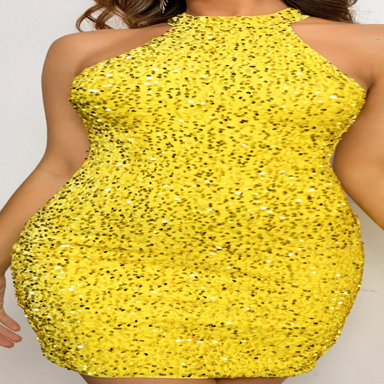

In [ ]:
# Print the first data sample in the dataset - an image and a text caption pair
print(dataset["train"][0])

# Visualize the image of the first data sample
dataset["train"][0]["image"]

You can also opt to download only a specific split of the dataset or pass in the `streaming=True` argument in order to download smaller subsets.

In [ ]:
# Download only the training split of the dataset
dataset = load_dataset("adirik/fashion_image_caption-100", split="train")

## Task 7: CV / Multi-Modal Pipeline - Part 1/2

We learned to how download datasets easily with the datasets library and tricks such as streaming to download data samples one by one if we don't have sufficient disk space for the whole dataset.

As demonstrated in the previous task, the image captions of the `"adirik/fashion_image_caption-100"` dataset are not very high quality. Could we create a better version of this dataset? Let's first setup an image captioning pipeline to see if we can generate better captions.

In this task, you will learn

- How to create an multi-modal / image captioning pipeline with [BLIP](https://huggingface.co/docs/transformers/main/en/model_doc/blip)
- How to use `datasets` library datasets as input to `transformers` models
- How to postprocess / decode BLIP output to retrieve human-readable captions

### Instructions

Take a look at the `Salesforce/blip-image-captioning-base` repository on the Hugging Face Hub and determine the model and preprocessor classes.

- Import the correct preprocessor and model classes from transformers
- Using the `from_pretrained()` method
    - Create a preprocessor 
    - Download and load the pre-trained model
- Perform inference with a single image sample
- Decode model output

In [ ]:
# Import BlipProcessor and BlipForConditionalGeneration from transformers
from transformers import BlipProcessor, BlipForConditionalGeneration

# Load preprocessor of "Salesforce/blip-image-captioning-base"
preprocessor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

# Load pre-trained "Salesforce/blip-image-captioning-base" model
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

Data preprocessor classes of Python are designed for ease of use. You can simply pass in a single or a list of Pillow image/s, url/s or local path/s to your image as the main argument to `ImageProcessor` class instances. 

In [ ]:
# Preprocess the first image of the dataset
inputs = preprocessor(dataset[0]["image"], return_tensors="pt")

The inference is almost the same as the NLP task as BLIP is a conditional text generation model. We will need to call `model.generate()` to run the model and use the `decode` method of the preprocessor to convert the output caption to a human readable format.

In [ ]:
# With torch.no_grad()
with torch.no_grad():
    # Predict caption using the generate method of the model
    outputs = model.generate(**inputs)

# Decode model output to text
caption = preprocessor.decode(outputs[0], skip_special_tokens=True)

# Print decoded caption
print(caption)

a woman wearing a yellow sequin dress


## Task 8: CV / Multi-Modal Pipeline - Part [2/2]

Seems like we were able to come up with a more intuitive yet less detailed image caption, but that is good enough for us. For this final task, you will learn 

- How to create a mapping function to preprocess and generate new captions for all samples in the datasets
- How to push a dataset to the Hugging Face Hub under your username

### Warning

This step is computationally intensive and takes several minutes to run in Workspace Premium. It does not consistently run in the free version of Workspace.

### Instructions

You will create a `replace_caption()` function that takes a dictionary `{"image": ..., "text": ...}` as input.

- Create `replace_caption()` function with a single argument named data
    - Place the preprocessing and inference steps of the previous task within this function and use the "image" value as input
    - Set the decoded output as the new value of the "text" key
    - Return the updated data dictionary
- Use [Dataset.map()](https://huggingface.co/docs/datasets/process#map) method to apply the function to whole dataset
- Use [Dataset.push_to_hub()](https://huggingface.co/docs/datasets/upload_dataset) method to push the updated dataset to the hub

In [ ]:
# Create a replace_caption function that takes a data dictionary as input
def replace_caption(data):
    # Preprocess the image value of the data dictionary
    inputs = preprocessor(data["image"], return_tensors="pt")

    # Predict the caption with torch.no_grad and the generate method
    with torch.no_grad():
        output = model.generate(**inputs)

    # Decode model output to text
    caption = preprocessor.decode(output[0], skip_special_tokens=True)
    
    # Set caption as the new text value of the data dictionary
    data["text"] = caption
    return data

# Use the map function to replace the captions of whole dataset
new_dataset = dataset.map(replace_caption)

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

## Task 9: Pushing Datasets (and Models) to the Hub

The [Hugging Face Hub](https://huggingface.co) is a Git platform specialized for machine learning. You can search for pre-trained model and dataset repositories on the website, clone or create and update repositories public or private repositories.

Alternatively, you can use the `huggingface_hub` Python package to programmatically:

- Login to the Hub.
- Search for open-source models on the Hub based on task type, model name, description, etc.
- Download specific or all files from a repository.
- Manage your repositories.

When in doubt, refer to the corresponding Hugging Face [documentation](https://huggingface.co/docs/huggingface_hub/) to get started.

### Instructions

Use the `huggingface_hub` library to programatically interact with the Hugging Face Hub.

- Login to your Hugging Face account using your HUGGINGFACE_TOKEN.
- Push the updated dataset to the Hub

In [ ]:
# Assign your HUGGINGFACE_TOKEN to a variable named hf_token
hf_token = os.environ["HUGGINGFACE_TOKEN"]

# Login to the HF Hub using your hf_token
hf_hub.login(hf_token)

Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid.
Your token has been saved to /home/repl/.huggingface/token
Login successful


In [ ]:
# Push the new / improved dataset to the hub 
your_username = "adirik"
new_dataset.push_to_hub(f"{your_username}/fashion_image_caption-100")